<a href="https://colab.research.google.com/github/Kan-tapon/229352-Statistical-Learning-for-Data-Science-670510751/blob/main/Lab07_Boosted_trees_670510751.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Boosted tree models on a simulated dataset

- [AdaBoostClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn-ensemble-adaboostclassifier)
- [XGBClassifier documentation](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier)
- [LGBMClassifier documentation](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm-lgbmclassifier)
- [GridSeachCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


- [Data](https://github.com/donlapark/ds352-labs/raw/main/Lab06-data.zip)


Perform GridSearchCV of the following three models on the provided training set (`X_train.csv` and `y_train.csv`)

1. Evaluate these models on the test set (`X_test.csv` and `y_test.csv`). **Keep searching (using cross-validation) until you find the model that achieves > 0.83 out-of-fold accuracy (use `GridSeachCV.best_score_` to obtain the out-of-fold accuracy)**

2. Report the test accuracy of your best model.

3. For each model, plot the feature importances

For `AdaBoostClassifier`, feature importances can be obtained by calling the `feature_importances_` attribute after fitting the model.

For `XGBClassifier` and `LGBMClassifier`, feature importances can be obtained using the library’s `plot_importance` function. Here is a minimal example in XGBoost:

In [58]:
!wget https://github.com/donlapark/ds352-labs/raw/main/Lab06-data.zip

--2026-01-19 15:41:42--  https://github.com/donlapark/ds352-labs/raw/main/Lab06-data.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/donlapark/ds352-labs/main/Lab06-data.zip [following]
--2026-01-19 15:41:42--  https://raw.githubusercontent.com/donlapark/ds352-labs/main/Lab06-data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5611 (5.5K) [application/zip]
Saving to: ‘Lab06-data.zip.3’

Lab06-data.zip.3    100%[===================>]   5.48K  --.-KB/s    in 0s      

2026-01-19 15:41:42 (63.1 MB/s) - ‘Lab06-data.zip.3’ saved [5611/5611]



In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier


In [60]:
!unzip -o Lab06-data.zip
X_train = pd.read_csv("X_train.csv", header=None)
y_train = pd.read_csv("y_train.csv", header=None).squeeze()

X_test = pd.read_csv("X_test.csv", header=None)
y_test = pd.read_csv("y_test.csv", header=None).squeeze()

# Assign consistent column names
X_train.columns = [f'feature_{i}' for i in range(X_train.shape[1])]
X_test.columns = [f'feature_{i}' for i in range(X_test.shape[1])]

Archive:  Lab06-data.zip
  inflating: X_test.csv              
  inflating: X_train.csv             
  inflating: y_test.csv              
  inflating: y_train.csv             


# AdaBoostClassifier

In [61]:
ada = AdaBoostClassifier(random_state=42)

ada_param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1, 0.5, 1.0]
}

#search
ada_gs = GridSearchCV(
    estimator=ada,
    param_grid=ada_param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

ada_gs.fit(X_train, y_train)

#result
print("AdaBoost best CV accuracy:", ada_gs.best_score_)
print("AdaBoost best parameters:", ada_gs.best_params_)

#test
ada_best = ada_gs.best_estimator_
ada_test_acc = accuracy_score(y_test, ada_best.predict(X_test))

print("AdaBoost test accuracy:", ada_test_acc)

AdaBoost best CV accuracy: 0.8442967884828351
AdaBoost best parameters: {'learning_rate': 0.05, 'n_estimators': 100}
AdaBoost test accuracy: 0.8351648351648352


# XGBClassifier

XGBoost best CV accuracy: 0.8439645625692137
XGBoost best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
XGBoost test accuracy: 0.8351648351648352


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:42:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


<Figure size 800x500 with 0 Axes>

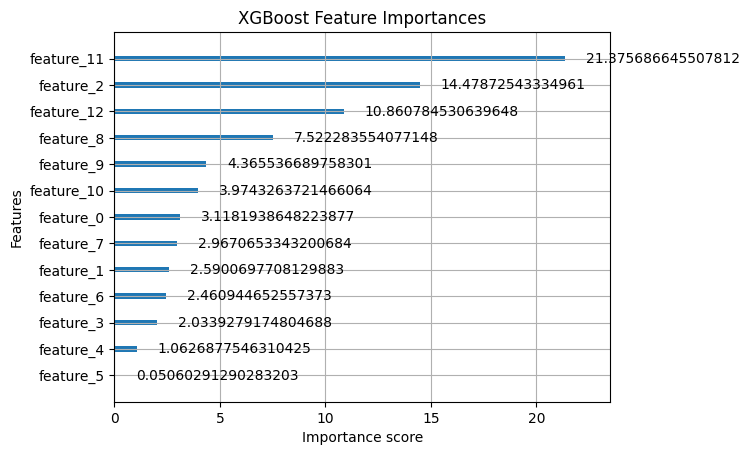

In [62]:
from xgboost import XGBClassifier, plot_importance

xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42
)

#hyperparameter
xgb_param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

#search
xgb_gs = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

xgb_gs.fit(X_train, y_train)

#result
print("XGBoost best CV accuracy:", xgb_gs.best_score_)
print("XGBoost best parameters:", xgb_gs.best_params_)

#test
xgb_best = xgb_gs.best_estimator_
xgb_test_acc = accuracy_score(y_test, xgb_best.predict(X_test))

print("XGBoost test accuracy:", xgb_test_acc)

plt.figure(figsize=(8,5))
plot_importance(xgb_best, importance_type="gain")
plt.title("XGBoost Feature Importances")
plt.show()

# LGBMClassifier

LightGBM best CV accuracy: 0.8017718715393134
LightGBM best parameters: {'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 300, 'num_leaves': 15}
LightGBM test accuracy: 0.8351648351648352


<Figure size 800x500 with 0 Axes>

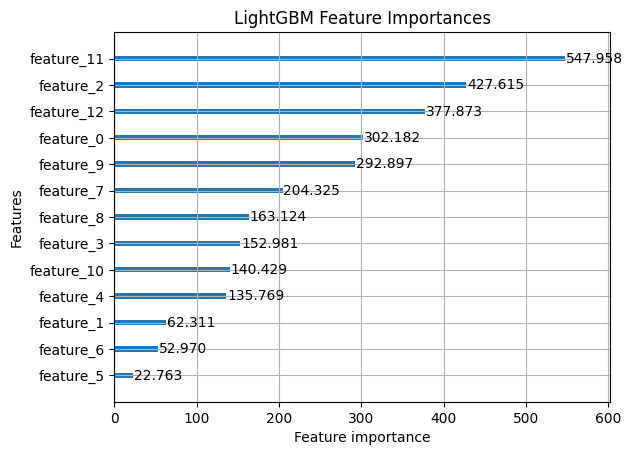

In [63]:
from lightgbm import LGBMClassifier, plot_importance
lgbm = LGBMClassifier(random_state=42)

#hyperparameter
lgbm_param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1],
    "num_leaves": [15, 31, 63],
    "max_depth": [-1, 5, 10]
}

#search
lgbm_gs = GridSearchCV(
    estimator=lgbm,
    param_grid=lgbm_param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

lgbm_gs.fit(X_train, y_train)

#result
print("LightGBM best CV accuracy:", lgbm_gs.best_score_)
print("LightGBM best parameters:", lgbm_gs.best_params_)

#test
lgbm_best = lgbm_gs.best_estimator_
lgbm_test_acc = accuracy_score(y_test, lgbm_best.predict(X_test))

print("LightGBM test accuracy:", lgbm_test_acc)

plt.figure(figsize=(8,5))
plot_importance(lgbm_best, importance_type="gain")
plt.title("LightGBM Feature Importances")
plt.show()


# Final Selection

In [64]:
results = {
    "AdaBoost": ada_test_acc,
    "XGBoost": xgb_test_acc,
    "LightGBM": lgbm_test_acc
}

best_model = max(results, key=results.get)

print("Best model:", best_model)
print("Test accuracy:", results[best_model])


Best model: AdaBoost
Test accuracy: 0.8351648351648352
